# From Neurons to Networks: Exploring Deep Learning Algorithms

Roderick Perez, Ph.D.
OMV

---

1. Install TensorFlow

In [1]:
!pip install tensorflow

In [2]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2024-10-22 16:27:40.409368: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-22 16:27:40.559016: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 16:27:46.476782: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 16:27:48.615747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 16:27:51.604737: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
# Define input and output
inputs = np.array([[2.0, 1.0, 3.0, 1.0]])  # TensorFlow expects 2D input: batch_size x features
true_output = np.array([[1.0, 0.0]])       # True output we want (batch_size x output_size)

2. Define the Neural Network Model

In TensorFlow, you can define the model using the Sequential API, which is simple for stacking layers in sequence.

In [4]:
# Build a simple neural network model with TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),     # Input layer with 4 nodes
    tf.keras.layers.Dense(2, activation='relu', kernel_initializer='ones', bias_initializer='zeros')  # Hidden layer with 2 neurons, ReLU, weights set to ones
])

* Input Layer: `Input(shape=(4,))` takes 4 input features.
* Dense Layer: The hidden layer has 2 neurons and uses ReLU activation. The weights are initialized as ones (`kernel_initializer='ones'`), and the biases are initialized as zeros (`bias_initializer='zeros'`).

3. Define Loss and Optimizer

To train the model, you need a loss function and an optimizer. Here, we use Mean Squared Error (MSE) for loss and Stochastic Gradient Descent (SGD) as the optimizer.

In [5]:
# Compile the model with loss and optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Stochastic Gradient Descent optimizer
              loss='mean_squared_error')  # Mean Squared Error for loss

4. Train the Model

We train the model using the fit method, which performs forward and backward passes and updates weights accordingly. Here, we train for 10 epochs.

In [6]:
# Train the model for 10 epochs
history = model.fit(inputs, true_output, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 42.5000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 29.9880
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 21.1595
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 14.9302
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 10.5347
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 7.4333
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 5.2449
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 3.7008
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.6113
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.8425


* `inputs`: The input data (batch size x input features).
* `true_output`: The true output you want the model to learn.
* `epochs=10`: Number of iterations to update weights.
* `verbose=1`: Shows training progress for each epoch.

5. See model architecture

```python
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 10        
=================================================================
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
```

This output breaks down the architecture:

	•	Input Layer: Takes input with shape (4,).
	•	Dense Layer: Contains 2 neurons. The number of parameters is calculated as (input_size + 1) * number_of_neurons = (4 + 1) * 2 = 10 parameters (8 weights + 2 biases).

In [8]:
# Display the architecture and parameters of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

6. Plot the Error Over Iterations

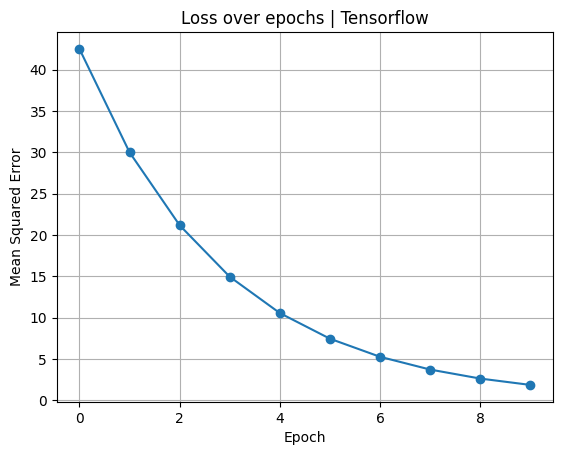

In [7]:
plt.plot(history.history['loss'], marker = 'o')
plt.title('Loss over epochs | Tensorflow')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.show()